In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing


In [6]:
"""読み込みと標準化"""

#読み込み
squat1_x_df = pd.read_csv(f'../images/squat1_x_df.csv',index_col=0)
squat1_y_df = pd.read_csv(f'../images/squat1_y_df.csv',index_col=0)
squat2_x_df = pd.read_csv(f'../images/squat2_x_df.csv',index_col=0)
squat2_y_df = pd.read_csv(f'../images/squat2_y_df.csv',index_col=0)

#標準化（関数）
def standarizatioin_df(df):
    ss = preprocessing.StandardScaler()
    l_2d_standardization = ss.fit_transform(df)
    df['leftHip'] = ss.fit_transform(df['leftHip'].values.reshape(-1, 1))
    df['rightHip'] = ss.fit_transform(df['rightHip'].values.reshape(-1, 1))
    return df

#標準化
squat1_x_df = standarizatioin_df(squat1_x_df)
squat1_y_df = standarizatioin_df(squat1_y_df)
squat2_x_df = standarizatioin_df(squat2_x_df)
squat2_y_df = standarizatioin_df(squat2_y_df)


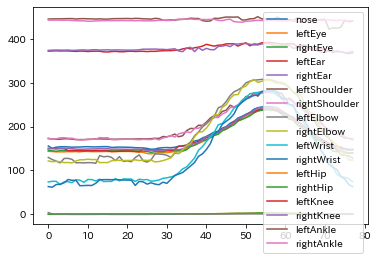

In [12]:
"""グラフ描画"""

# 
def draw_graph(df):
    fig = plt.figure()
    ax = fig.add_subplot()
    
    for i in range(squat1_y_df.shape[1]):
        ax.plot(squat1_y_df.index,squat1_y_df.iloc[:,i])
    
    ax.legend(['nose','leftEye','rightEye','leftEar','rightEar','leftShoulder',
                'rightShoulder','leftElbow','rightElbow','leftWrist','rightWrist',
                'leftHip','rightHip','leftKnee','rightKnee','leftAnkle','rightAnkle'])

    plt.show()

    


draw_graph(squat1_y_df)

In [53]:
def more_plotpoints(df1,df2):
    
    #df1について、プロット点を線分の内分点で割増
    df1_l_list = []
    df1_r_list = []
    df1_ttf_l_list = []
    df1_ttf_r_list = []
    
    #rightとleftについてそれぞれ計算
    print(df1.shape,df2.shape)
    for i in range(df1.shape[0]-1):
        for j in range(df2.shape[0]):
            df1_l_list.append(((df2.shape[0]-j)*df1.iloc[i,0]+j*df1.iloc[i+1,0])/df1.shape[0])
            df1_r_list.append(((df2.shape[0]-j)*df1.iloc[i,1]+j*df1.iloc[i+1,1])/df1.shape[0])
            '''df1_ttf_l_list.append(((df2.shape[0]-j)*df1.iloc[i,2]+j*df1.iloc[i+1,2])/df1.shape[0])
            df1_ttf_r_list.append(((df2.shape[0]-j)*df1.iloc[i,3]+j*df1.iloc[i+1,3])/df1.shape[0])'''
    
    #df2について、プロット点を線分の内分点で割増
    df2_l_list = []
    df2_r_list = []
    df2_ttf_l_list = []
    df2_ttf_r_list = []
    
    #rightとleftについてそれぞれ計算
    for i in range(df2.shape[0]-1):
        for j in range(df1.shape[0]):
            df2_l_list.append(((df1.shape[0]-j)*df2.iloc[i,0]+j*df2.iloc[i+1,0])/df2.shape[0])
            df2_r_list.append(((df1.shape[0]-j)*df2.iloc[i,1]+j*df2.iloc[i+1,1])/df2.shape[0])
            '''df2_ttf_l_list.append(((df1.shape[0]-j)*df2.iloc[i,2]+j*df2.iloc[i+1,2])/df2.shape[0])
            df2_ttf_r_list.append(((df1.shape[0]-j)*df2.iloc[i,3]+j*df2.iloc[i+1,3])/df2.shape[0])'''
    
    #df作成
    '''
    df1 = pd.DataFrame([df1_l_list,df1_r_list,df1_ttf_l_list,df1_ttf_r_list],index=['leftHip','rightHip','fft_leftHip','fft_rightHip']).T
    df2 = pd.DataFrame([df2_l_list,df2_r_list,df2_ttf_l_list,df2_ttf_r_list],index=['leftHip','rightHip','fft_leftHip','fft_rightHip']).T
    '''
    df1 = pd.DataFrame([df1_l_list,df1_r_list],index=['leftHip','rightHip']).T
    df2 = pd.DataFrame([df2_l_list,df2_r_list],index=['leftHip','rightHip']).T
    display(df1)
    display(df2)
    
    #描画
    fig = plt.figure(figsize=(24,9))
    ax = fig.add_subplot(1,2,1)
    ax.plot(df1['leftHip'])
    ax.plot(df1['rightHip'])
    ax = fig.add_subplot(1,2,2)
    ax.plot(df2['leftHip'])
    ax.plot(df2['rightHip'])
    plt.show()

    return df1,df2




def crop_filter(df):
    #初期レベルは一番座標が小さい所(画像では最高点)
    lowest_level_1 = int((df['leftHip'].idxmin() + df['rightHip'].idxmin()) / 2)
    highest_level =  int((df['leftHip'].idxmax() + df['rightHip'].idxmax()) / 2)
    lowest_level_2 = int((df['leftHip'][df['leftHip'].idxmax():].idxmin() + df['rightHip'][df['rightHip'].idxmax():].idxmin()) / 2)
        
    crop_df = df[['leftHip','rightHip']].iloc[lowest_level_1:lowest_level_2,:]
    
    return crop_df


def high_pass_filter(df):
    fig = plt.figure(figsize=(24,9))
    ax = fig.add_subplot(1,2,1)
    ax.plot(df['leftHip'])
    ax.plot(df['rightHip'])


    df['fft_leftHip'] = np.fft.fft(df['leftHip'])
    df['fft_rightHip'] = np.fft.fft(df['rightHip'])
    display(df)
    print(df.shape)

    
    ax = fig.add_subplot(1,2,2)
    freq = np.fft.fftfreq(df.shape[0])
    ax.plot(freq,df['fft_leftHip'].values.real)
    ax.plot(freq,df['fft_rightHip'].values.real)
    plt.show()

    return df

(98, 2) (64, 2)


,leftHip,rightHip
0,-0.639105,-0.657037
1,-0.639013,-0.656931
2,-0.638921,-0.656826
3,-0.638829,-0.656721
4,-0.638738,-0.656615
...,...,...
6203,-0.421337,-0.180934
6204,-0.421362,-0.180983
6205,-0.421387,-0.181032
6206,-0.421412,-0.181082


,leftHip,rightHip
0,-1.459718,-1.462917
1,-1.459761,-1.460045
2,-1.459804,-1.457173
3,-1.459846,-1.454301
4,-1.459889,-1.451429
...,...,...
6169,-0.801035,-1.145453
6170,-0.802586,-1.156817
6171,-0.804136,-1.168181
6172,-0.805687,-1.179545


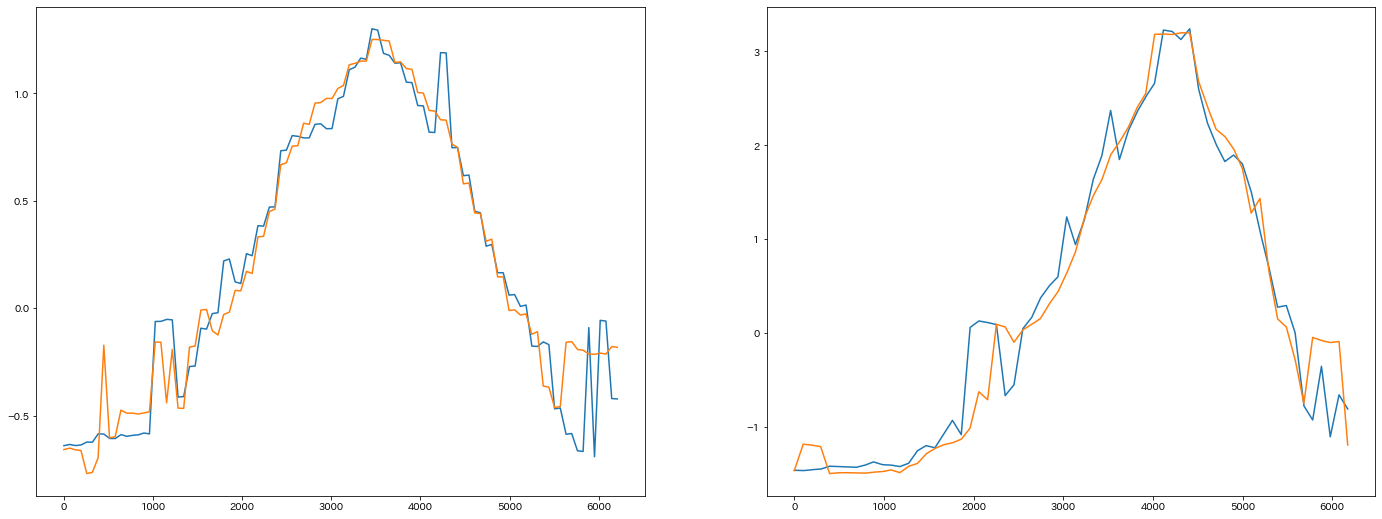

In [54]:
crop_squat2_y_df = crop_filter(squat2_y_df)
crop_squat1_y_df = crop_filter(squat1_y_df)

plot_squat2_y_df,plot_squat1_y_df = more_plotpoints(crop_squat2_y_df,crop_squat1_y_df)

In [55]:
'''plot_squat2_y_df.to_csv('../images/diluted_squat2_y_df.csv',index=None)
plot_squat1_y_df.to_csv('../images/diluted_squat1_y_df.csv',index=None)'''

"plot_squat2_y_df.to_csv('../../images/diluted_squat2_y_df.csv',index=None)\nplot_squat1_y_df.to_csv('../../images/diluted_squat1_y_df.csv',index=None)"

,leftHip,rightHip,fft_leftHip,fft_rightHip
0,-0.639105,-0.657037,1316.502306+0.000000j,1386.027870+0.000000j
1,-0.639013,-0.656931,-2533.858055+882.835779j,-2434.838791+953.732009j
2,-0.638921,-0.656826,96.023995-304.875631j,306.136266-279.408530j
3,-0.638829,-0.656721,95.033790+38.284270j,59.865355+113.729534j
4,-0.638738,-0.656615,57.309135+77.188608j,29.189151+201.954819j
...,...,...,...,...
6203,-0.421337,-0.180934,141.051576-92.297623j,54.145600-144.636674j
6204,-0.421362,-0.180983,57.309135-77.188608j,29.189151-201.954819j
6205,-0.421387,-0.181032,95.033790-38.284270j,59.865355-113.729534j
6206,-0.421412,-0.181082,96.023995+304.875631j,306.136266+279.408530j


(6208, 4)


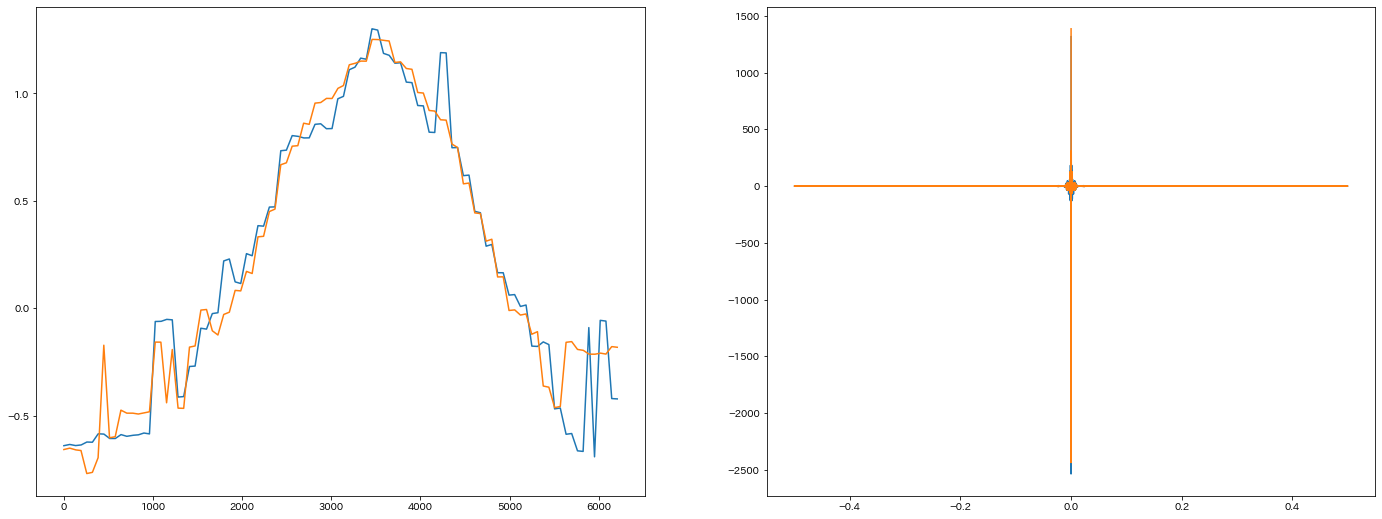

,leftHip,rightHip,fft_leftHip,fft_rightHip
0,-1.459718,-1.462917,2020.514704+0.000000j,1949.248502+0.000000j
1,-1.459761,-1.460045,-3604.594831+5275.099625j,-3172.613447+5662.396807j
2,-1.459804,-1.457173,-1288.221486-710.095533j,-1063.974433-762.635506j
3,-1.459846,-1.454301,361.475193-226.876550j,615.191839-313.970021j
4,-1.459889,-1.451429,-105.207486-120.084480j,-0.570538+274.538964j
...,...,...,...,...
6169,-0.801035,-1.145453,-264.921217-147.600266j,218.426129-167.778475j
6170,-0.802586,-1.156817,-105.207486+120.084480j,-0.570538-274.538964j
6171,-0.804136,-1.168181,361.475193+226.876550j,615.191839+313.970021j
6172,-0.805687,-1.179545,-1288.221486+710.095533j,-1063.974433+762.635506j


(6174, 4)


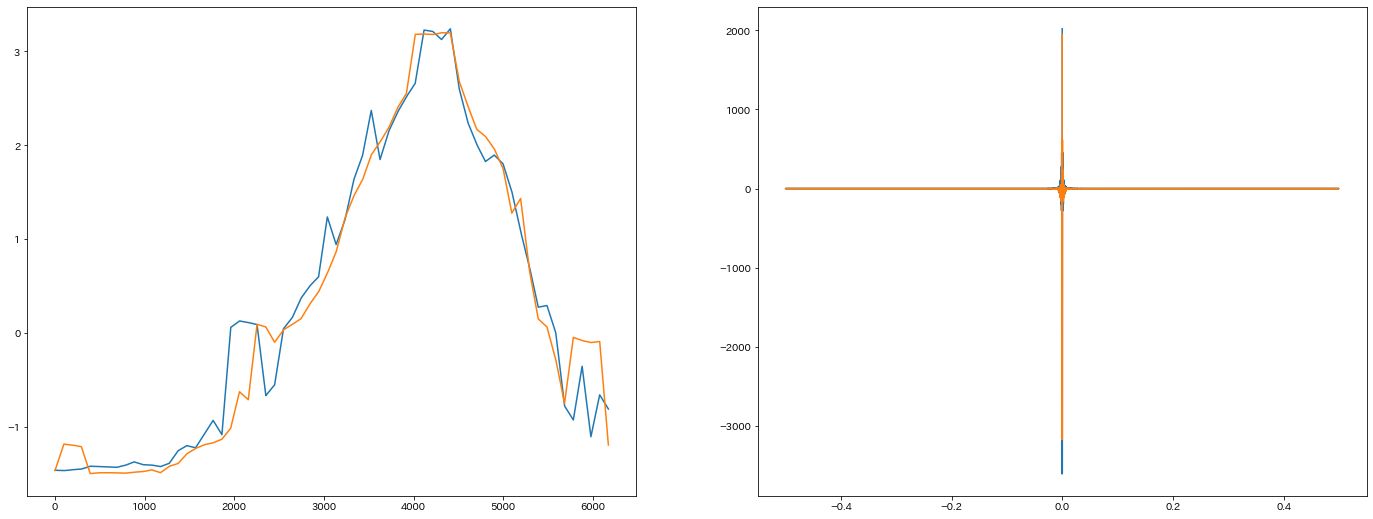

In [56]:
high_squat2_y_df = high_pass_filter(plot_squat2_y_df)
high_squat1_y_df = high_pass_filter(plot_squat1_y_df)

In [69]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [72]:
lendim  = min(plot_squat2_y_df.shape[0],plot_squat1_y_df.shape[0])
#leftHip
a = cos_sim(plot_squat2_y_df.iloc[:lendim,0],plot_squat1_y_df.iloc[:lendim,0])
print(a)
b = cos_sim(plot_squat2_y_df.iloc[:lendim,1],plot_squat1_y_df.iloc[:lendim,1])
print(b)

(0.7849702269155149+0.7522968189322474)/2

0.7849702269155149
0.7522968189322474


0.7686335229238812